In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [3]:
import tensorflow as tf
import os

In [4]:
os.path.join('data', 'tiger')

'data/tiger'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [6]:
if not os.path.exists('data'):
    os.makedirs('data')

In [7]:
import os
cwd = os.getcwd()
print(cwd)

/content


In [8]:
import os
permissions = os.stat(cwd).st_mode
if not permissions & 0o400:
  print("You do not have write permissions for the current directory.")
else:
  print("You have write permissions for the current directory")

You have write permissions for the current directory


In [9]:
import os
os.listdir('data')

[]

In [16]:
gpus=tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [17]:
len(gpus)

1

In [18]:
#Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [19]:
#1.2 Remove dodgy images

import cv2
import imghdr
from matplotlib import pyplot as plt

In [20]:
data_dir = 'data'

In [22]:
print(data_dir)

data


In [23]:
os.listdir(data_dir)

['tiger', 'other', '.ipynb_checkpoints']

In [24]:
os.listdir(os.path.join(data_dir, 'tiger'))

['002688.jpg',
 '000668.jpg',
 '002239.jpg',
 '003189.jpg',
 '002779.jpg',
 '001335.jpg',
 '002614.jpg',
 '002514.jpg',
 '002874.jpg',
 '003942.jpg',
 '000194.jpg',
 '000421.jpg',
 '001683.jpg',
 '000476.jpg',
 '002915.jpg',
 '002722.jpg',
 '003809.jpg',
 '000503.jpg',
 '000488.jpg',
 '000728.jpg',
 '000259.jpg',
 '001534.jpg',
 '001665.jpg',
 '003756.jpg',
 '001847.jpg',
 '003161.jpg',
 '001616.jpg',
 '003179.jpg',
 '000794.jpg',
 '000239.jpg',
 '001048.jpg',
 '002751.jpg',
 '003356.jpg',
 '002321.jpg',
 '000556.jpg',
 '003213.jpg',
 '001093.jpg',
 '003593.jpg',
 '001191.jpg',
 '000338.jpg',
 '000822.jpg',
 '001858.jpg',
 '000580.jpg',
 '002485.jpg',
 '002777.jpg',
 '003053.jpg',
 '003146.jpg',
 '003224.jpg',
 '002407.jpg',
 '002908.jpg',
 '002278.jpg',
 '002930.jpg',
 '003711.jpg',
 '003275.jpg',
 '000830.jpg',
 '003914.jpg',
 '002217.jpg',
 '001956.jpg',
 '002595.jpg',
 '001517.jpg',
 '001405.jpg',
 '002942.jpg',
 '001506.jpg',
 '002138.jpg',
 '002358.jpg',
 '002664.jpg',
 '003229.j

In [25]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [26]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [27]:
image_exts[1]

'jpg'

In [28]:
for image_class in os.listdir(data_dir):
   print(image_class)

tiger
other
.ipynb_checkpoints


In [29]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

002688.jpg
000668.jpg
002239.jpg
003189.jpg
002779.jpg
001335.jpg
002614.jpg
002514.jpg
002874.jpg
003942.jpg
000194.jpg
000421.jpg
001683.jpg
000476.jpg
002915.jpg
002722.jpg
003809.jpg
000503.jpg
000488.jpg
000728.jpg
000259.jpg
001534.jpg
001665.jpg
003756.jpg
001847.jpg
003161.jpg
001616.jpg
003179.jpg
000794.jpg
000239.jpg
001048.jpg
002751.jpg
003356.jpg
002321.jpg
000556.jpg
003213.jpg
001093.jpg
003593.jpg
001191.jpg
000338.jpg
000822.jpg
001858.jpg
000580.jpg
002485.jpg
002777.jpg
003053.jpg
003146.jpg
003224.jpg
002407.jpg
002908.jpg
002278.jpg
002930.jpg
003711.jpg
003275.jpg
000830.jpg
003914.jpg
002217.jpg
001956.jpg
002595.jpg
001517.jpg
001405.jpg
002942.jpg
001506.jpg
002138.jpg
002358.jpg
002664.jpg
003229.jpg
001988.jpg
003885.jpg
002275.jpg
002175.jpg
003646.jpg
003665.jpg
002519.jpg
000067.jpg
003304.jpg
001077.jpg
003916.jpg
002348.jpg
000613.jpg
003451.jpg
003476.jpg
000084.jpg
002856.jpg
003322.jpg
000776.jpg
003519.jpg
003422.jpg
001110.jpg
001437.jpg
002586.jpg

In [ ]:
img = cv2.imread(os.path.join('data', 'tiger', '000011.jpg'))

In [31]:
type(img)

numpy.ndarray

In [32]:
img.shape

(546, 649, 3)

In [33]:
# to solve img.shape coding -1
import os

file_path = os.path.join('data', 'tiger', '000011.jpg')
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

In [34]:
print(img)

[[[ 13  14  18]
  [ 13  14  18]
  [ 13  14  18]
  ...
  [ 43  57  75]
  [ 46  60  78]
  [ 50  64  83]]

 [[ 12  13  17]
  [ 12  13  17]
  [ 12  13  17]
  ...
  [ 40  54  72]
  [ 45  59  77]
  [ 48  62  81]]

 [[ 12  13  17]
  [ 12  13  17]
  [ 12  13  17]
  ...
  [ 35  49  68]
  [ 40  54  73]
  [ 45  58  80]]

 ...

 [[150 177 203]
  [120 148 172]
  [ 82 109 135]
  ...
  [149 182 208]
  [152 185 211]
  [152 182 209]]

 [[150 174 202]
  [137 162 188]
  [119 143 171]
  ...
  [145 177 206]
  [149 181 210]
  [144 176 205]]

 [[171 195 223]
  [145 169 197]
  [121 145 173]
  ...
  [147 179 208]
  [154 186 215]
  [154 186 215]]]


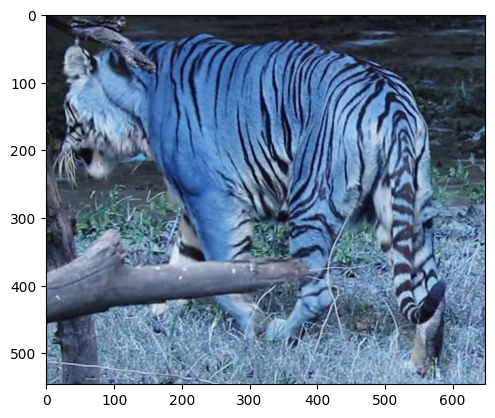

In [35]:
plt.imshow(img)

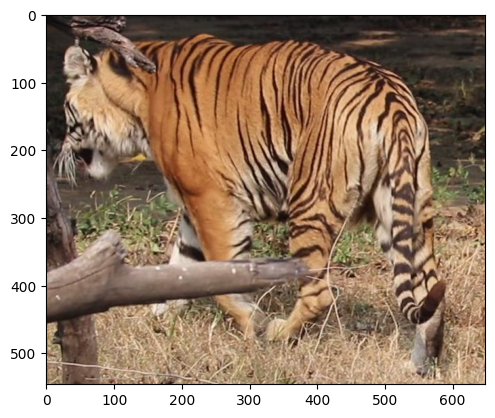

In [36]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

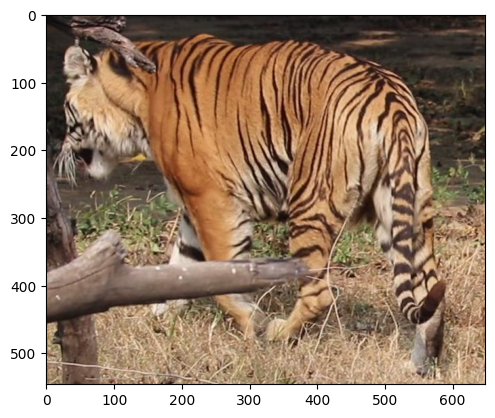

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
for image_class in os.listdir(data_dir):
  if os.path.isdir(image_class):
    for image in os.listdir(os.path.join(data_dir, image_class)):
      image_path = os.path.join(data_dir, image_class, image)
      try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
          print('Image not in ext list {}'.format(image_path))
          os.remove(image_path)
      except Exception as e:
        print('Issue with image {}'.format(image_path))

In [ ]:
tf.data.Dataset??

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
data= tf.keras.utils.image_dataset_from_directory('data')

Found 1149 files belonging to 2 classes.


In [ ]:
tf.keras.utils.image_dataset_from_directory('data',batch_size=8,image_size=(128,128))

Found 1149 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
batch = data_iterator.next()

In [ ]:
batch

(array([[[[196.4396  , 197.4396  , 192.4396  ],
          [114.03613 , 115.03613 , 110.03613 ],
          [143.00638 , 144.00638 , 139.00638 ],
          ...,
          [ 96.      ,  64.      ,  67.      ],
          [ 98.66016 ,  66.66016 ,  69.66016 ],
          [ 99.22656 ,  67.22656 ,  70.22656 ]],
 
         [[111.23111 , 112.23111 , 106.23111 ],
          [150.41974 , 151.41974 , 145.41974 ],
          [175.58377 , 176.58377 , 170.58377 ],
          ...,
          [ 94.29471 ,  64.29471 ,  66.29471 ],
          [ 96.66016 ,  66.66016 ,  68.66016 ],
          [ 95.90625 ,  65.90625 ,  67.90625 ]],
 
         [[153.7565  , 154.7565  , 147.02213 ],
          [184.75174 , 185.75174 , 178.01736 ],
          [174.25592 , 175.25592 , 167.52155 ],
          ...,
          [ 92.1904  ,  63.057587,  65.05759 ],
          [ 94.79297 ,  65.66016 ,  67.66016 ],
          [ 95.12833 ,  65.995514,  67.995514]],
 
         ...,
 
         [[165.75333 , 150.75333 , 127.75333 ],
          [179.226

In [ ]:
len(batch)

2

In [ ]:
batch [0]

array([[[[196.4396  , 197.4396  , 192.4396  ],
         [114.03613 , 115.03613 , 110.03613 ],
         [143.00638 , 144.00638 , 139.00638 ],
         ...,
         [ 96.      ,  64.      ,  67.      ],
         [ 98.66016 ,  66.66016 ,  69.66016 ],
         [ 99.22656 ,  67.22656 ,  70.22656 ]],

        [[111.23111 , 112.23111 , 106.23111 ],
         [150.41974 , 151.41974 , 145.41974 ],
         [175.58377 , 176.58377 , 170.58377 ],
         ...,
         [ 94.29471 ,  64.29471 ,  66.29471 ],
         [ 96.66016 ,  66.66016 ,  68.66016 ],
         [ 95.90625 ,  65.90625 ,  67.90625 ]],

        [[153.7565  , 154.7565  , 147.02213 ],
         [184.75174 , 185.75174 , 178.01736 ],
         [174.25592 , 175.25592 , 167.52155 ],
         ...,
         [ 92.1904  ,  63.057587,  65.05759 ],
         [ 94.79297 ,  65.66016 ,  67.66016 ],
         [ 95.12833 ,  65.995514,  67.995514]],

        ...,

        [[165.75333 , 150.75333 , 127.75333 ],
         [179.22656 , 164.22656 , 141.22656 ]

In [ ]:
batch [0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

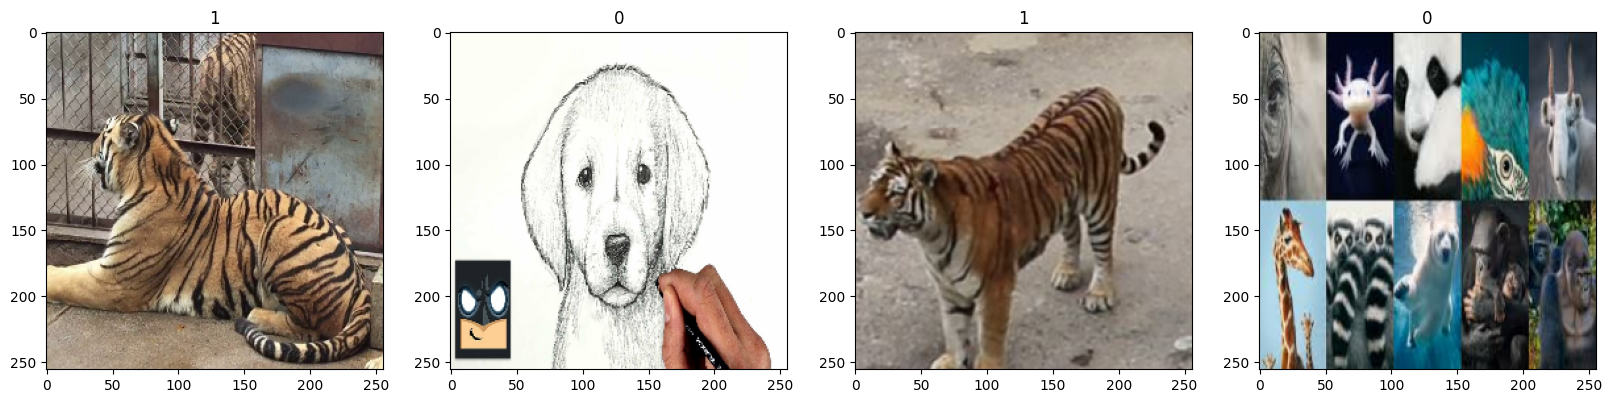

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
# Get another iterator from the iterator
batch=data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
# class 0 = others
# class 1 = tiger
batch[1]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

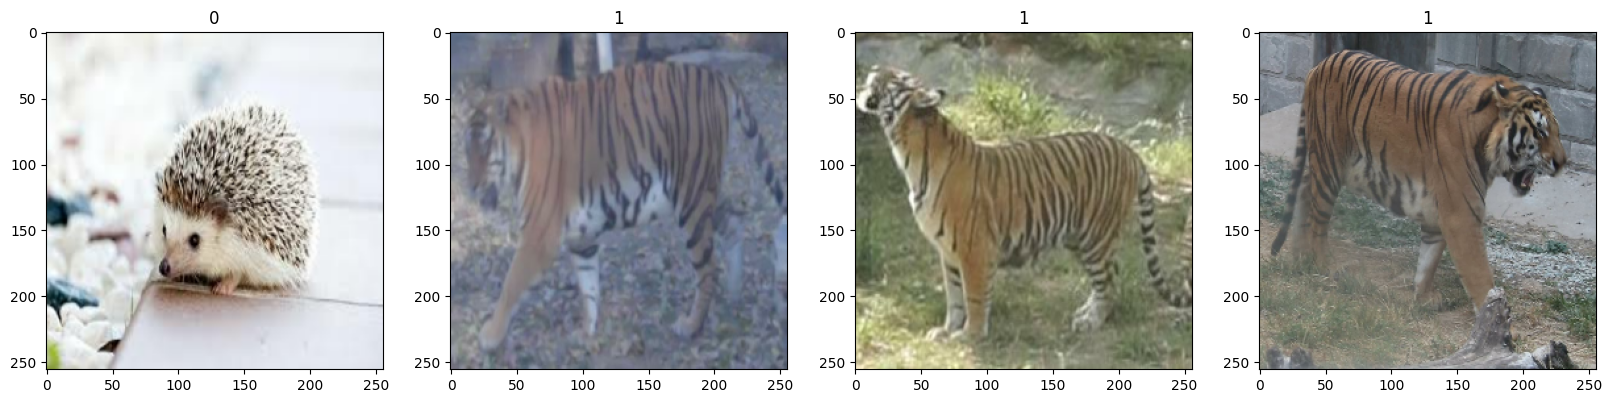

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
scaled= batch[0] /255

In [ ]:
scaled.min()

0.0

In [ ]:
scaled.max()

1.0

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator=data.as_numpy_iterator()

In [ ]:
batch=scaled_iterator.next()

In [ ]:
batch[0].min()

0.0

In [ ]:
batch[0].max()

1.0

In [ ]:
len(data)

36

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
train_size+val_size+test_size

37

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(test)

3

In [ ]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 26.2 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout

In [ ]:
model = Sequential()

In [ ]:
#
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu',))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu',))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
25/25 [==============================] - 13s 205ms/step - loss: 0.4166 - accuracy: 0.8213 - val_loss: 0.2989 - val_accuracy: 0.8477
Epoch 2/20
25/25 [==============================] - 7s 260ms/step - loss: 0.2624 - accuracy: 0.8963 - val_loss: 0.2034 - val_accuracy: 0.9414
Epoch 3/20
25/25 [==============================] - 6s 211ms/step - loss: 0.2074 - accuracy: 0.9450 - val_loss: 0.1316 - val_accuracy: 0.9570
Epoch 4/20
25/25 [==============================] - 7s 260ms/step - loss: 0.1353 - accuracy: 0.9475 - val_loss: 0.1344 - val_accuracy: 0.9570
Epoch 5/20
25/25 [==============================] - 6s 212ms/step - loss: 0.0961 - accuracy: 0.9650 - val_loss: 0.0889 - val_accuracy: 0.9688
Epoch 6/20
25/25 [==============================] - 7s 258ms/step - loss: 0.0597 - accuracy: 0.9825 - val_loss: 0.0849 - val_accuracy: 0.9727
Epoch 7/20
25/25 [==============================] - 7s 229ms/step - loss: 0.0457 - accuracy: 0.9825 - val_loss: 0.0338 - val_accuracy: 0.9922
Epoch

In [ ]:
hist.history

{'loss': [0.4165540933609009,
  0.2624058425426483,
  0.20738744735717773,
  0.13526013493537903,
  0.09614260494709015,
  0.059688374400138855,
  0.04566715657711029,
  0.029828738421201706,
  0.01509553287178278,
  0.007596587762236595,
  0.0047547826543450356,
  0.001275622402317822,
  0.001655676169320941,
  0.09603153169155121,
  0.03033166006207466,
  0.01744878478348255,
  0.0065801674500107765,
  0.002968194428831339,
  0.000770163896959275,
  0.00044637496466748416],
 'accuracy': [0.8212500214576721,
  0.8962500095367432,
  0.9449999928474426,
  0.9474999904632568,
  0.9649999737739563,
  0.9825000166893005,
  0.9825000166893005,
  0.9937499761581421,
  0.9962499737739563,
  0.9987499713897705,
  0.9987499713897705,
  1.0,
  1.0,
  0.9612500071525574,
  0.9900000095367432,
  0.9975000023841858,
  0.9975000023841858,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.29892054200172424,
  0.2034287452697754,
  0.13155676424503326,
  0.1344415247440338,
  0.08890802413225174,
  0.084899723529

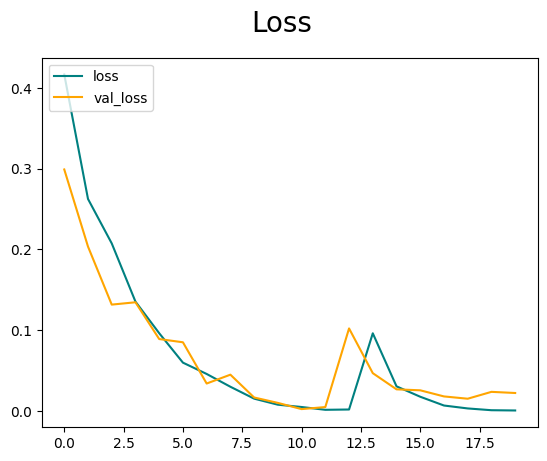

In [ ]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

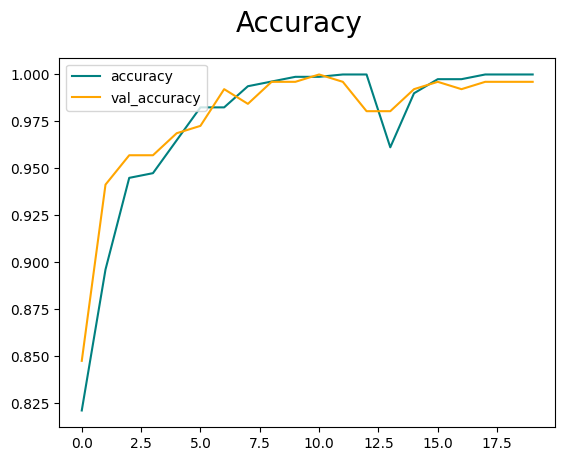

In [ ]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re= Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

3

In [ ]:
for batch in test.as_numpy_iterator():
  x,y=batch
  yhat=model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 1s 561ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


In [ ]:
import cv2

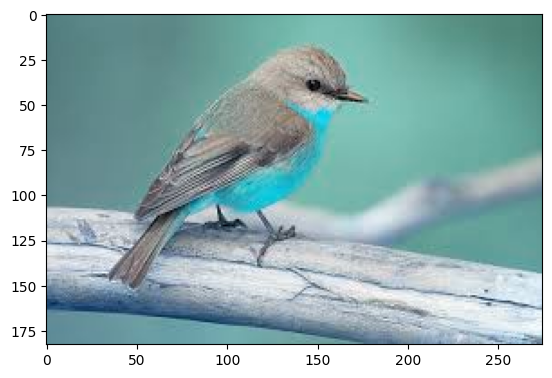

In [ ]:
image = cv2.imread(os.path.join(data_dir,'bird.jpeg' ))
plt.imshow(image)
plt.show()

In [ ]:
image_gt = tf.io.decode_image(tf.io.read_file(os.path.join(data_dir,'bird.jpeg')), channels=3)
image_gt = tf.image.convert_image_dtype(image_gt, tf.float32, saturate=False)
image_gt = tf.print(image_gt, [tf.reduce_max(image_gt)], "image_gt_cast")

[[[0.48627454 0.494117677 0.309803933]
  [0.48627454 0.494117677 0.309803933]
  [0.490196109 0.498039246 0.313725501]
  ...
  [0.443137288 0.501960814 0.286274523]
  [0.443137288 0.501960814 0.286274523]
  [0.443137288 0.501960814 0.286274523]]

 [[0.48627454 0.494117677 0.309803933]
  [0.48627454 0.494117677 0.309803933]
  [0.490196109 0.498039246 0.313725501]
  ...
  [0.443137288 0.501960814 0.286274523]
  [0.443137288 0.501960814 0.286274523]
  [0.443137288 0.501960814 0.286274523]]

 [[0.48627454 0.494117677 0.309803933]
  [0.48627454 0.494117677 0.309803933]
  [0.490196109 0.498039246 0.313725501]
  ...
  [0.443137288 0.501960814 0.286274523]
  [0.443137288 0.501960814 0.286274523]
  [0.443137288 0.501960814 0.286274523]]

 ...

 [[0.580392182 0.549019635 0.368627459]
  [0.580392182 0.549019635 0.368627459]
  [0.580392182 0.549019635 0.368627459]
  ...
  [0.627451 0.564705908 0.474509835]
  [0.623529434 0.568627477 0.466666698]
  [0.623529434 0.568627477 0.466666698]]

 [[0.580392

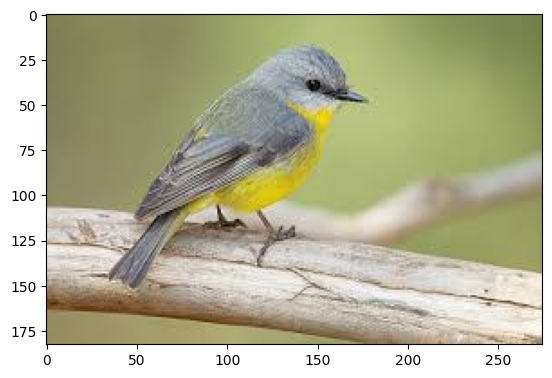

In [ ]:
image=cv2.imread(os.path.join(data_dir,'bird.jpeg'))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

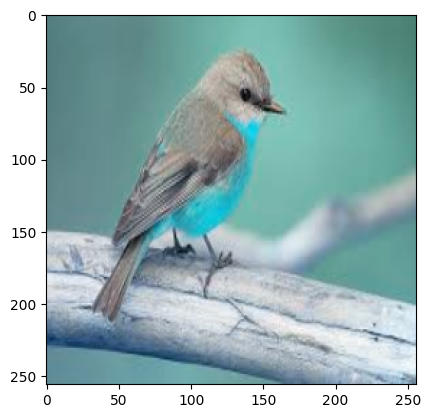

In [ ]:
resize=tf.image.resize(image,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

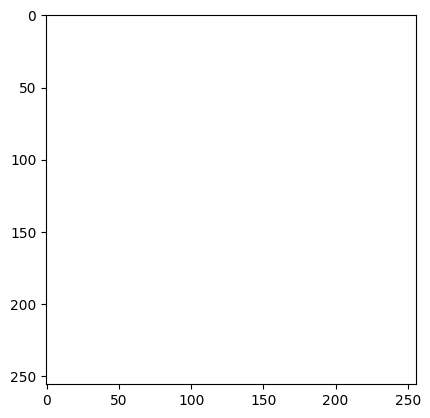

In [ ]:
resize=tf.image.resize(image,(256,256))
plt.imshow(cv2.cvtColor(resize.numpy(),cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 81.03711 , 125.03711 , 126.03711 ],
        [ 82.      , 126.      , 127.      ],
        [ 82.18555 , 126.18555 , 127.18555 ],
        ...,
        [ 74.18555 , 128.18555 , 115.18555 ],
        [ 74.      , 128.      , 115.      ],
        [ 74.      , 128.      , 115.      ]],

       [[ 81.03711 , 125.03711 , 126.03711 ],
        [ 82.      , 126.      , 127.      ],
        [ 82.18555 , 126.18555 , 127.18555 ],
        ...,
        [ 74.18555 , 128.18555 , 115.18555 ],
        [ 74.      , 128.      , 115.      ],
        [ 74.      , 128.      , 115.      ]],

       [[ 81.03711 , 125.03711 , 126.03711 ],
        [ 82.      , 126.      , 127.      ],
        [ 82.18555 , 126.18555 , 127.18555 ],
        ...,
        [ 74.18555 , 128.18555 , 115.18555 ],
        [ 74.      , 128.      , 115.      ],
        [ 74.      , 128.      , 115.      ]],

       ...,

       [[ 94.      , 139.      , 150.      ],
        [ 94.

In [ ]:
np.expand_dims(resize,0)

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 19ms/step


In [ ]:
yhat

array([[5.6381406e-05]], dtype=float32)

In [ ]:
if yhat>0.5:
  print(f'Predicted class is tiger')
else:
  print(f'Predicted class is other')

Predicted class is other


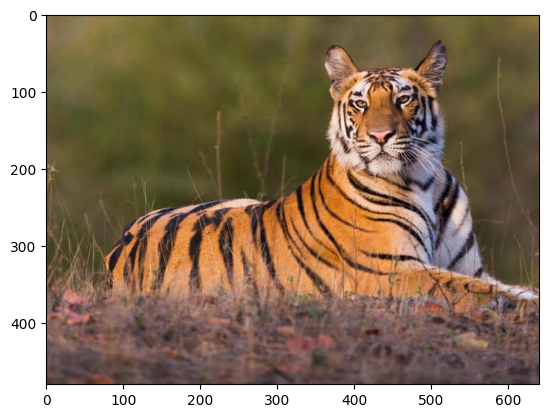

In [ ]:
image=cv2.imread(os.path.join(data_dir,'test1.jpg'))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

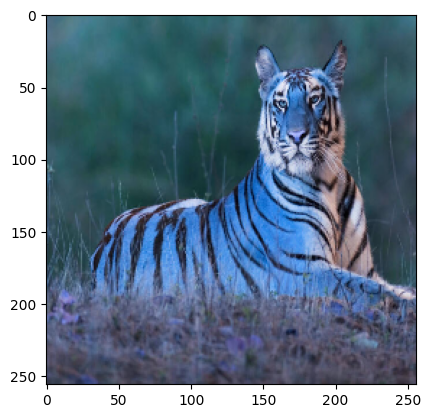

In [ ]:
resize=tf.image.resize(image,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

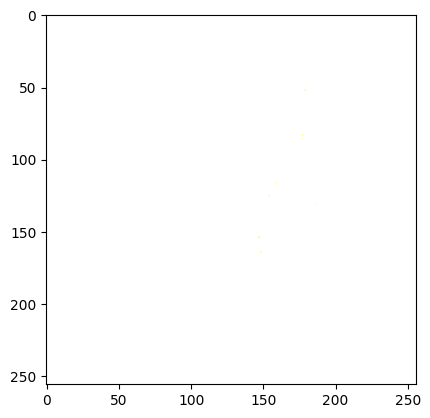

In [ ]:
resize=tf.image.resize(image,(256,256))
plt.imshow(cv2.cvtColor(resize.numpy(),cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 80.      , 110.      , 127.      ],
        [ 78.328125, 108.328125, 125.328125],
        [ 76.25    , 106.25    , 123.25    ],
        ...,
        [ 60.      , 121.      , 135.      ],
        [ 61.65625 , 120.      , 135.      ],
        [ 64.15625 , 120.      , 135.      ]],

       [[ 80.3125  , 110.3125  , 129.3125  ],
        [ 78.75    , 108.75    , 127.75    ],
        [ 77.078125, 107.078125, 126.078125],
        ...,
        [ 60.25    , 120.28125 , 134.76562 ],
        [ 63.125   , 120.      , 135.      ],
        [ 65.9375  , 120.      , 135.3125  ]],

       [[ 81.046875, 110.046875, 131.04688 ],
        [ 79.75    , 108.75    , 129.75    ],
        [ 77.390625, 106.390625, 127.390625],
        ...,
        [ 61.953125, 118.859375, 133.85938 ],
        [ 65.28125 , 119.859375, 135.      ],
        [ 68.375   , 120.1875  , 136.1875  ]],

       ...,

       [[ 60.984375,  64.171875,  86.671875],
        [ 53.

In [ ]:
np.expand_dims(resize,0)

array([[[[ 80.      , 110.      , 127.      ],
         [ 78.328125, 108.328125, 125.328125],
         [ 76.25    , 106.25    , 123.25    ],
         ...,
         [ 60.      , 121.      , 135.      ],
         [ 61.65625 , 120.      , 135.      ],
         [ 64.15625 , 120.      , 135.      ]],

        [[ 80.3125  , 110.3125  , 129.3125  ],
         [ 78.75    , 108.75    , 127.75    ],
         [ 77.078125, 107.078125, 126.078125],
         ...,
         [ 60.25    , 120.28125 , 134.76562 ],
         [ 63.125   , 120.      , 135.      ],
         [ 65.9375  , 120.      , 135.3125  ]],

        [[ 81.046875, 110.046875, 131.04688 ],
         [ 79.75    , 108.75    , 129.75    ],
         [ 77.390625, 106.390625, 127.390625],
         ...,
         [ 61.953125, 118.859375, 133.85938 ],
         [ 65.28125 , 119.859375, 135.      ],
         [ 68.375   , 120.1875  , 136.1875  ]],

        ...,

        [[ 60.984375,  64.171875,  86.671875],
         [ 53.078125,  57.03125 ,  76.765625]

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 24ms/step


In [ ]:
yhat

array([[0.9524729]], dtype=float32)

In [ ]:
if yhat>0.5:
  print(f'Predicted class is tiger')
else:
  print(f'Predicted class is other')

Predicted class is tiger


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','tigerclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
import os

# Load the model from the 'models' directory
new_model = load_model(os.path.join('models', 'tigerclassifier.h5'))

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 68ms/step


array([[0.9855177]], dtype=float32)